# 1 Author

**Student Name**:  Zhong Zhenghan

**Student ID**:  210982480

**Github**:  https://github.com/buptxinghan/CBU5201_miniproject_Zhenghan

# 2 Problem formulation

In the basic part, we want to solve the following two problems:

- Smile detection: Determine whether the person in the picture is smiling.
- 3D head pose estimation: predict the 3D orientation of the head.

## 2.1 Smile detection
- The machine learning problem I need to solve is to determine whether a person is smiling based on an image of their face. Smiling is an important way for humans to express emotions and can reflect a person's mood, attitude and personality. Smile detection can be applied in many fields, such as human-computer interaction, emotion analysis, social media, advertising recommendation, etc.

## 2.2 3D head pose estimation
- The machine learning problem I need to solve is to predict the orientation of a person's head in a given image. There are many applications in this direction, such as face recognition, human-computer interaction, driver monitoring, and augmented reality. It is also challenging because it requires learning from high-dimensional and noisy data.

**Among them, the smile detection problem is a classification problem, and the 3D head pose estimation problem is a regression problem, so I use two models to solve these two problems to achieve better results. **

# 3 Machine Learning pipeline


My machine learning process consists of the following stages:

- **Data Loading**: Read data from image folders and label files, and create a custom dataset class to load and process images.

- **Data Partition**: Divide the data set into training set, validation set and test set, and use different data loaders to load different data subsets.

- **Data conversion**: Perform some preprocessing and enhancement on the image, such as scaling, cropping, flipping, normalization, etc., to improve the generalization ability and stability of the model.

- **Model building**: Use a pre-trained ResNet50 model as a feature extractor, and then add a fully connected layer to the last layer for binary classification (smiling or not smiling).

- **Model training**: Use the cross-entropy loss function and stochastic gradient descent optimizer to train the model. After each epoch, evaluate the validation set and print the validation loss.

- **Model Test**: Use the test set to test the model, calculate the model's accuracy, confusion matrix and other performance indicators on the test set to demonstrate the effect of the model.

- **Model Save**: Save the model's status dictionary to a local file for easy loading and use later.

# 4 Transformation stage

The purpose of the conversion stage is to perform some preprocessing and enhancement on the input images to improve the performance and generalization ability of the model.

During the conversion phase, I performed the following transformations on the image:

- **Crop face**: Use OpenCV's face detector to detect the position of the face from the image, and then crop the face area as input to the model. This can remove irrelevant information from the image and improve the attention and accuracy of the model.

- **Scale Image**: Scale the image to the size of 224 x 224, which is the input size of the ResNet50 model to ensure input consistency and compatibility.

- **Random horizontal flip**: Randomly flip the image horizontally. This is a data enhancement method that can increase the diversity and randomness of the data and prevent model overfitting.

- **Convert to Tensor**: Convert the image from PIL.Image format to PyTorch's tensor format to facilitate model calculation and processing.

- **Normalized image**: Normalize each channel of the image, using the mean and standard deviation of the ResNet50 model on the ImageNet data set, which can make the distribution of the image closer to the distribution of the pre-trained model , improve the performance of the model.

# 5 Modelling


In the modeling stage, I used the pre-trained ResNet50 model as my base model. It is a proven deep convolutional neural network with strong feature extraction capabilities and can perform well in image classification and feature extraction. Good results. I use the pre-trained model because it has been trained on a large-scale image data set. I can use the idea of transfer learning to transfer the learned features to my task, speed up the convergence of the model, and improve model performance.

In the smile detection model:

- I added a fully connected layer to the last layer to limit the output to binary output. Because I need to change the output of the model to smile or not smile.

In the 3D head pose detection model:

- I used weights pre-trained on ImageNet, which can use a large amount of data to initialize the parameters of the model and speed up the convergence of the model. I added a fully connected layer to the last layer to limit the output to ternary outputs. Because I need to change the output of the model to pitch, yaw, roll of the head.

# 6 Methodology

I used the following methods to train and validate my model:

- Data set division: I divided the data set into three subsets: training set, validation set, and test set. The training set accounts for 60% of the data set, the validation set accounts for 20%, and the test set accounts for 20%.

- Loss function: I used the cross-entropy loss function, which is a commonly used loss function for classification tasks that can measure the difference between the model's predicted probability and the true label. The smaller the better.

- Optimizer: I used a stochastic gradient descent optimizer, which updates the parameters of the model based on the gradient of the model to minimize the model's loss function. I set the learning rate to 0.001 and the momentum to 0.9, which are some empirical parameters that can adjust the update speed and stability of the model.

- Training process: I divide the training process of the model into multiple epochs. Each epoch will traverse the training set, using a small batch of data each time to perform forward propagation and back propagation, calculate the loss and gradient, and update the parameters. . When the loss on the validation set no longer decreases, I set up an early stopping strategy to prevent the model from overfitting.

- Verification process: After each epoch, I will evaluate the verification set, use the forward propagation of the model to calculate the loss value on the verification set, and then print it out to facilitate observation of the verification of the model.

- Performance evaluation: After the model training is completed, I will use the test set for testing, and use the forward propagation of the model to calculate the accuracy, confusion matrix and other performance indicators on the test set to demonstrate the effect of the model.

In [1]:
# Import some of the necessary packages:
import os
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models, transforms
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import confusion_matrix, classification_report


# 7 Dataset


The data set we use is The MPLab GENKI Database, which is an image database that contains different races, genders, ages, expressions, lighting, backgrounds, and postures. There are a total of 4,000 images, and each image has a corresponding label. The label contains four values, including whether to smile and the pitch, yaw and roll angles of the head.

I performed the following preprocessing on the data set:

- **Data loading**: I created a custom dataset class, inherited PyTorch's Dataset class, and overridden the init, len and getitem methods to load and process images. In the init method, I read the path to the images folder and label files, stored the labels in a list, and then loaded OpenCV's face detector. In the len method, I return the length of the dataset, which is the length of the label list. In the getitem method, I splice the path of the image based on the index, then use OpenCV to read and convert the image, then call the crop_face method to crop the face, and then determine whether there is a conversion function. If so, convert the image, and finally return Images and labels. I used PyTorch's DataLoader class to create different data loaders to load different subsets of the data, set the batch size to 4, and shuffled them

- **Data partitioning**: I randomly divided the data set into training set, validation set and test set with a ratio of 6:2:2, that is, the training set has 2400 images, and the validation set and test set have 800 images each.

## 7.1 Smile data processing

- Data loading

In [2]:
class Genki4kDataset(Dataset):
    def __init__(self, img_dir, labels_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.labels = []
        with open(labels_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                smile_label = int(parts[0])  # The first value is the smile tag
                self.labels.append(smile_label)
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'file{idx+1:04d}.jpg')
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 裁剪人脸
        image = self.crop_face(image)

        if self.transform:
            image = Image.fromarray(image)
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

    def crop_face(self, image):
        faces = self.face_cascade.detectMultiScale(image, 1.1, 4)
        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            return face  # Return the first detected face
        return image  # If no face is detected, return to the original image

- Pre-Processing

In [3]:
#Data preprocessing and enhancement
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# data_dir = '/root/MiniProject/MiniProject/genki4k/files'
# labels_path = '/root/MiniProject/MiniProject/genki4k/labels.txt'
data_dir = 'C:/Users/LENOVO/Desktop/MiniProject/MiniProject/genki4k/files'
labels_path = 'C:/Users/LENOVO/Desktop/MiniProject/MiniProject/genki4k/labels.txt'

dataset_sm = Genki4kDataset(data_dir, labels_path, transform=data_transforms['train'])

- Split the dataset

In [4]:

train_size = int(0.6 * len(dataset_sm))
val_size = int(0.2 * len(dataset_sm))
test_size = len(dataset_sm) - (train_size + val_size)
train_dataset_sm, val_dataset_sm, test_dataset_sm = random_split(dataset_sm, [train_size, val_size, test_size])

train_loader_sm = DataLoader(train_dataset_sm, batch_size=4, shuffle=True)
val_loader_sm = DataLoader(val_dataset_sm, batch_size=4, shuffle=True)
test_loader_sm = DataLoader(test_dataset_sm, batch_size=4, shuffle=False)

- Show image sample

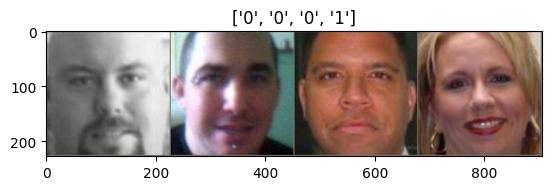

In [5]:
#Denormalization function
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get multiple batches of data until we have enough images to display
def show_images(data_loader, num_images):
    images_handled = 0
    for images, labels in data_loader:
        # How many images do we need in this batch
        images_needed = num_images - images_handled
        # If there are more images in this batch than we need, only process the images we need
        if len(images) > images_needed:
            images = images[:images_needed]
            labels = labels[:images_needed]
        # Show images and labels
        out = torchvision.utils.make_grid(images)
        imshow(out, title=[str(label.item()) for label in labels])
        images_handled += len(images)
        if images_handled >= num_images:
            break

# Display 4 images
show_images(train_loader_sm, 4)


## 7.2 3D头部姿态数据处理

- Data loading

In [6]:
class HeadPoseDataset(Dataset):
    def __init__(self, img_dir, labels_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.labels = []
        with open(labels_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                # Extract head posture angle
                pitch, yaw, roll = float(parts[1]), float(parts[2]), float(parts[3])
                self.labels.append((pitch, yaw, roll))
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'file{idx+1:04d}.jpg')
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = self.crop_face(image)
        if self.transform:
            image = Image.fromarray(image)
            image = self.transform(image)

        # Convert labels directly to tensors
        label_tensor = torch.tensor(self.labels[idx]).float()

        return image, label_tensor

    def crop_face(self, image):
        faces = self.face_cascade.detectMultiScale(image, 1.1, 4)
        for (x, y, w, h) in faces:
            face = image[y:y+h, x:x+w]
            return face
        return image

- Pre-Processing

In [7]:
#Data preprocessing and enhancement
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './genki4k/files'
labels_path = './genki4k/labels.txt'

dataset_hd = HeadPoseDataset(data_dir, labels_path, transform=data_transforms['train'])

- Split the dataset

In [8]:

train_size = int(0.6 * len(dataset_hd))
val_size = int(0.2 * len(dataset_hd))
test_size = len(dataset_hd) - (train_size + val_size)
train_dataset_hd, val_dataset_hd, test_dataset_hd = random_split(dataset_hd, [train_size, val_size, test_size])

train_loader_hd = DataLoader(train_dataset_hd, batch_size=4, shuffle=True)
val_loader_hd = DataLoader(val_dataset_hd, batch_size=4, shuffle=True)
test_loader_hd = DataLoader(test_dataset_hd, batch_size=4, shuffle=False)

- Show picture samples

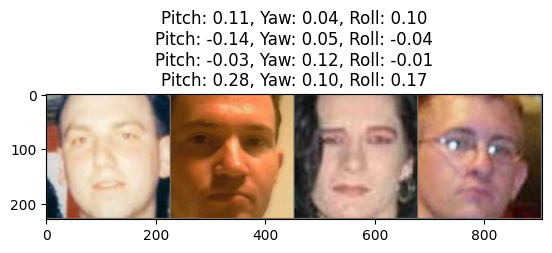

In [9]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title("\n".join(title))
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
dataiter = iter(train_loader_hd)
images, labels = next(dataiter)

# show image
out = torchvision.utils.make_grid(images)
titles = [f'Pitch: {l[0]:.2f}, Yaw: {l[1]:.2f}, Roll: {l[2]:.2f}' for l in labels]
imshow(out, title=titles)


The images in the data set contain facial images with a variety of different characteristics, such as expressions (with or without smiles), accessories (such as glasses and beards), headwear (such as hats and hair), presence or absence of background, image clarity, brightness and color (color or grayscale). This diversity enhances the complexity of the data set and helps improve the generalization ability and robustness of the machine learning model when facing different situations.

# 8 Results
Next we train and test the model.

- Define early stopping classes to prevent overfitting

In [10]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt'):
        """
        :param patience: Number of epochs to tolerate validation loss without improvement
        :param verbose: whether to print information
        :param delta: Minimum threshold for improvement
        :param path: path to save the model
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Save the model when the validation loss decreases'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model, self.path)
        self.val_loss_min = val_loss


## 8.1 Smile detection model training and testing

### 8.1.1 Model training

- Define the model

In [11]:
# Check if CUDA is available, define and move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

#Move model to GPU
model_sm = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
num_ftrs = model_sm.fc.in_features
model_sm.fc = nn.Linear(num_ftrs, 2)  # 2 outputs, smiling and not smiling
model_sm = model_sm.to(device)

# Define loss function and optimizer
criterion_sm = nn.CrossEntropyLoss()
optimizer_sm = optim.SGD(model_sm.parameters(), lr=0.001, momentum=0.9)

Using device: cuda


- Train the model

In [12]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    early_stopping = EarlyStopping(patience=5, verbose=True, path='model_sm_best.pt')
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        # Use tqdm to wrap the training data loader
        train_progress = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1} Training")
        for i, (inputs, labels) in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # Update the tqdm progress bar instead of printing the log
            train_progress.set_postfix(loss=(running_loss / (i + 1)))

        #Update the progress bar status after ending the epoch
        train_progress.close()

        model.eval()
        val_loss = 0.0
        # Use tqdm to wrap the validation data loader
        val_progress = tqdm(val_loader, total=len(val_loader), desc=f"Epoch {epoch+1} Validation")
        with torch.no_grad():
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                # Update tqdm progress bar to show verification loss
                val_progress.set_postfix(val_loss=(val_loss / len(val_loader)))

        # Print verification loss
        print(f'End of Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader)}')
        val_progress.close()

        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    return model

model_sm = train_model(model_sm, criterion_sm, optimizer_sm, train_loader_sm, val_loader_sm, num_epochs=5)


Epoch 1 Validation: 100%|██████████| 200/200 [00:25<00:00,  7.85it/s, val_loss=0.274]


End of Epoch 1, Validation Loss: 0.2742183294892311
Validation loss decreased (inf --> 54.843666).  Saving model ...


Epoch 2 Validation: 100%|██████████| 200/200 [00:23<00:00,  8.62it/s, val_loss=0.275] 


End of Epoch 2, Validation Loss: 0.27530194334452973
EarlyStopping counter: 1 out of 5


Epoch 3 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.95it/s, val_loss=0.24]  


End of Epoch 3, Validation Loss: 0.23950868779764278
Validation loss decreased (54.843666 --> 47.901738).  Saving model ...


Epoch 4 Validation: 100%|██████████| 200/200 [00:21<00:00,  9.40it/s, val_loss=0.237] 


End of Epoch 4, Validation Loss: 0.23739474361434532
Validation loss decreased (47.901738 --> 47.478949).  Saving model ...


Epoch 5 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.70it/s, val_loss=0.181] 


End of Epoch 5, Validation Loss: 0.18131090313720052
Validation loss decreased (47.478949 --> 36.262181).  Saving model ...


It can be seen from the output above that the training loss and verification loss of the model almost decrease with the increase of epoch, indicating that the learning effect of the model is good and there is no overfitting or underfitting phenomenon.

- Save model

In [13]:
torch.save(model_sm, 'model_sm_last.pt')

### 8.1.2 Model Testing

- Load model

     **Used to directly test the model**

In [14]:
model_sm = torch.load('model_sm_best.pt')

- Analyis the results

混淆矩阵:
[[321  25]
 [ 20 434]]


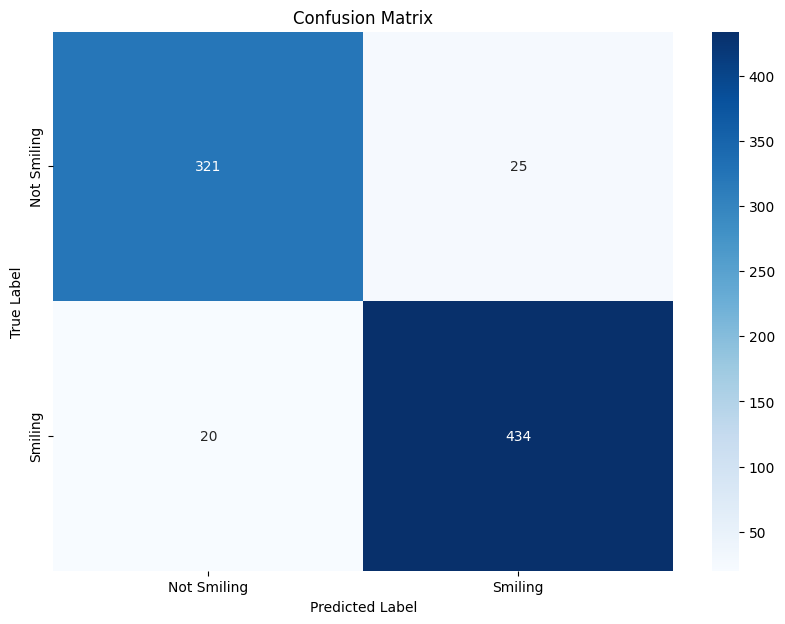


分类报告:
              precision    recall  f1-score   support

 Not Smiling       0.94      0.93      0.93       346
     Smiling       0.95      0.96      0.95       454

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [15]:
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

# Call the function of the test model
all_preds, all_labels = test_model(model_sm, test_loader_sm)

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Use seaborn to draw a heat map of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Smiling', 'Smiling'], 
            yticklabels=['Not Smiling', 'Smiling'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate other performance indicators
print("\nClassification report:")
print(classification_report(all_labels, all_preds, target_names=['Not Smiling', 'Smiling']))


As can be seen from the above output, the model's accuracy on the test set is 94%, which shows that the model's generalization ability is very strong and it can make correct judgments on unseen data.

From the above confusion matrix, it can be seen that the true examples (TP) of the model on the test set are 434, the true negative examples (TN) are 321, the false positive examples (FP) are 20, and the false negative examples (FN) are 25. It can be seen that the model The recognition capabilities in both categories are relatively balanced, with no obvious deviations or errors.

In addition, we can analyze other performance indicators of the model on the test set:

The precision, recall and F1-score of the model in both categories are all 0.94, indicating that the recognition ability of the model in both categories is relatively high, and there is no obvious deviation or error.

## 8.2 3D head posture prediction model training and testing

### 8.2.1 Model training

- Define the model

In [23]:
# Check if CUDA is available, define and move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

#Move model to GPU
model_hd = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
num_ftrs = model_hd.fc.in_features
model_hd.fc = nn.Linear(num_ftrs, 3)  # 3个输出，对应俯仰、偏航和翻滚角
model_hd = model_hd.to(device)

# Define loss function and optimizer
criterion_hd = nn.MSELoss()
optimizer_hd = optim.SGD(model_hd.parameters(), lr=0.001, momentum=0.9)


Using device: cuda


- 训练模型

In [24]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    early_stopping = EarlyStopping(patience=5, verbose=True, path='model_hd_best.pt')
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        # Use tqdm to wrap the training data loader
        train_progress = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1} Training")
        for i, (inputs, labels) in train_progress:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # Update the progress bar every 100 batches and reset running_loss
            # if i % 100 == 99:
            #     train_progress.set_postfix(loss=(running_loss / 100))
            #     running_loss = 0.0
            # else:
            #     #Continuously update the loss information of the progress bar
            #     train_progress.set_postfix(loss=(running_loss / (i % 100 + 1)))
            
            # Update the tqdm progress bar instead of printing the log
            train_progress.set_postfix(loss=(running_loss / (i + 1)))

        #Update the progress bar status after ending the epoch
        train_progress.close()

        model.eval()
        val_loss = 0.0
        # Use tqdm to wrap the validation data loader
        val_progress = tqdm(val_loader, total=len(val_loader), desc=f"Epoch {epoch+1} Validation")
        with torch.no_grad():
            for inputs, labels in val_progress:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                # Update tqdm progress bar to show verification loss
                val_progress.set_postfix(val_loss=(val_loss / len(val_loader)))

        # Print verification loss
        print(f'End of Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader)}')
        val_progress.close()

        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    return model

model_hd = train_model(model_hd, criterion_hd, optimizer_hd, train_loader_hd, val_loader_hd, num_epochs=50)

Epoch 1 Validation: 100%|██████████| 200/200 [00:19<00:00, 10.05it/s, val_loss=0.0501]


End of Epoch 1, Validation Loss: 0.050055830057244746
Validation loss decreased (inf --> 10.011166).  Saving model ...


Epoch 2 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.96it/s, val_loss=0.0462]


End of Epoch 2, Validation Loss: 0.046158993071876465
Validation loss decreased (10.011166 --> 9.231799).  Saving model ...


Epoch 3 Validation: 100%|██████████| 200/200 [00:22<00:00,  9.03it/s, val_loss=0.0384]


End of Epoch 3, Validation Loss: 0.03844889591448009
Validation loss decreased (9.231799 --> 7.689779).  Saving model ...


Epoch 4 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.83it/s, val_loss=0.0406]


End of Epoch 4, Validation Loss: 0.04060955339577049
EarlyStopping counter: 1 out of 5


Epoch 5 Validation: 100%|██████████| 200/200 [00:23<00:00,  8.48it/s, val_loss=0.0371]


End of Epoch 5, Validation Loss: 0.03705418420024216
Validation loss decreased (7.689779 --> 7.410837).  Saving model ...


Epoch 6 Validation: 100%|██████████| 200/200 [00:23<00:00,  8.40it/s, val_loss=0.0394]


End of Epoch 6, Validation Loss: 0.03936601698165759
EarlyStopping counter: 1 out of 5


Epoch 7 Validation: 100%|██████████| 200/200 [00:24<00:00,  8.29it/s, val_loss=0.0428]


End of Epoch 7, Validation Loss: 0.04281689040362835
EarlyStopping counter: 2 out of 5


Epoch 8 Validation: 100%|██████████| 200/200 [00:24<00:00,  8.25it/s, val_loss=0.0627]


End of Epoch 8, Validation Loss: 0.06269726120401174
EarlyStopping counter: 3 out of 5


Epoch 9 Validation: 100%|██████████| 200/200 [00:24<00:00,  8.25it/s, val_loss=0.0366]


End of Epoch 9, Validation Loss: 0.036608928781934086
Validation loss decreased (7.410837 --> 7.321786).  Saving model ...


Epoch 10 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.86it/s, val_loss=0.0366]


End of Epoch 10, Validation Loss: 0.03656312030274421
Validation loss decreased (7.321786 --> 7.312624).  Saving model ...


Epoch 11 Validation: 100%|██████████| 200/200 [00:21<00:00,  9.26it/s, val_loss=0.0474]


End of Epoch 11, Validation Loss: 0.04740446967538446
EarlyStopping counter: 1 out of 5


Epoch 12 Validation: 100%|██████████| 200/200 [00:21<00:00,  9.22it/s, val_loss=0.0554]


End of Epoch 12, Validation Loss: 0.055428095492534336
EarlyStopping counter: 2 out of 5


Epoch 13 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.92it/s, val_loss=0.0428]


End of Epoch 13, Validation Loss: 0.04282266590045765
EarlyStopping counter: 3 out of 5


Epoch 14 Validation: 100%|██████████| 200/200 [00:22<00:00,  8.79it/s, val_loss=0.0395]


End of Epoch 14, Validation Loss: 0.039499009395949546
EarlyStopping counter: 4 out of 5


Epoch 15 Validation: 100%|██████████| 200/200 [00:21<00:00,  9.48it/s, val_loss=0.0368]

End of Epoch 15, Validation Loss: 0.036751211867667735
EarlyStopping counter: 5 out of 5
Early stopping


- 保存模型

In [25]:
torch.save(model_hd, 'model_hd_last.pt')

### 8.2.2 模型测试

- 加载模型

    **用于直接测试模型，如果上面的过程跑过了这里不用运行**

In [26]:
model_hd = torch.load('model_hd_best.pt')

- Analyis the results

Average loss on test dataset: 0.03899934469955042
Mean Absolute Error for Pitch: 0.21865108609199524
Mean Absolute Error for Yaw: 0.09394571185112
Mean Absolute Error for Roll: 0.12071487307548523
(800, 3)
2


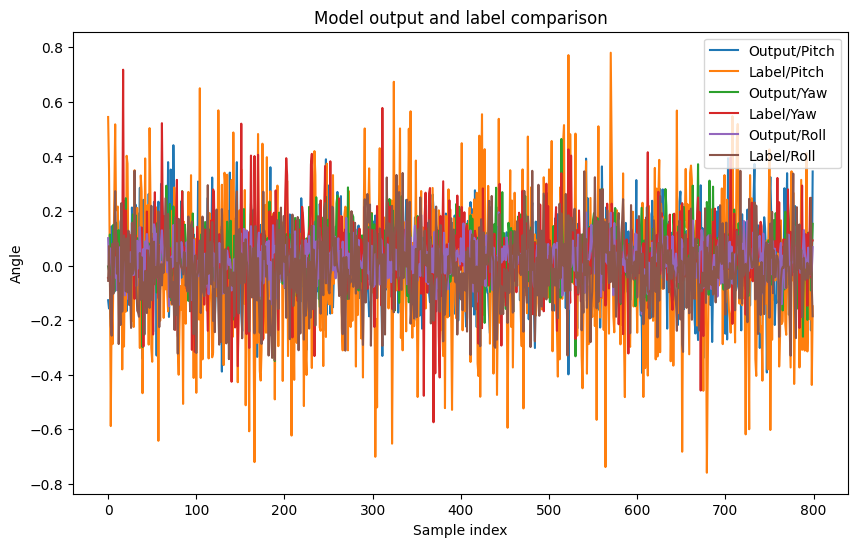

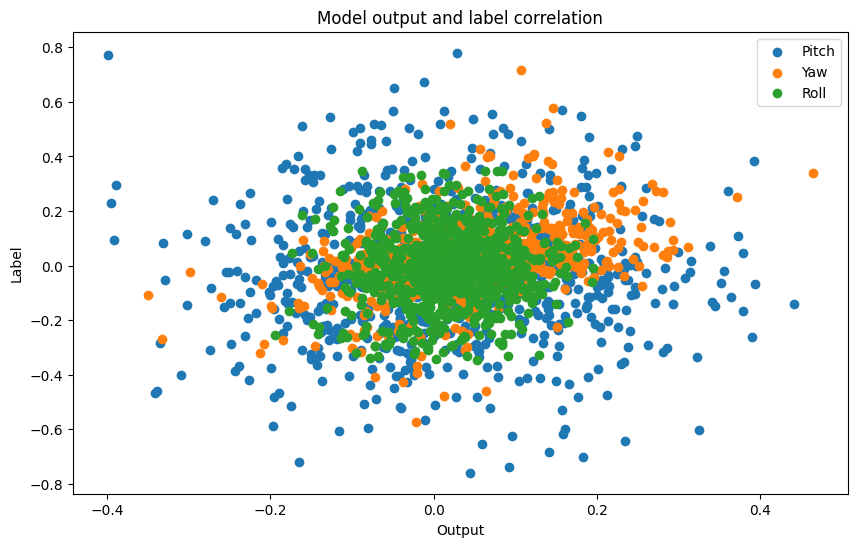

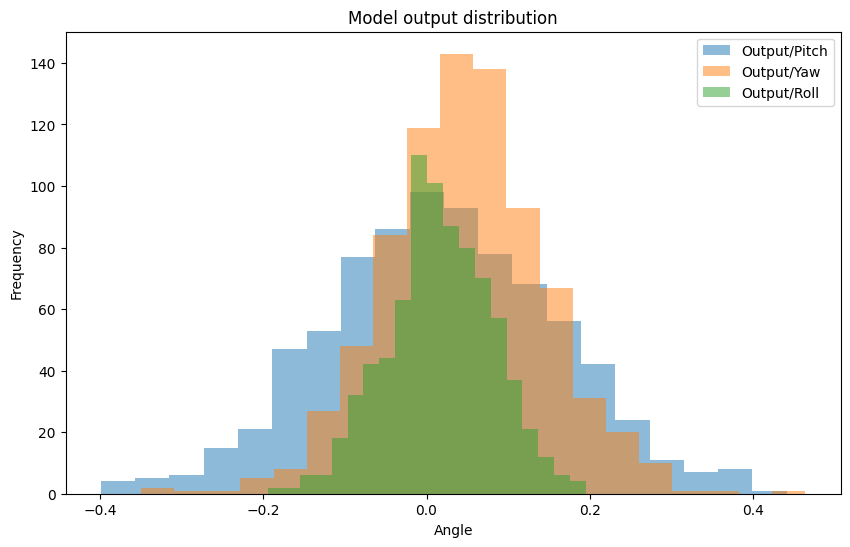

In [27]:
def test_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # 直接移动到设备上

            outputs = model(inputs)
            loss = criterion_hd(outputs, labels)
            total_loss += loss.item()
            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    avg_loss = total_loss / len(test_loader)
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return avg_loss, all_preds, all_labels

avg_loss, all_preds, all_labels = test_model(model_hd, test_loader_hd)
print(f'Average loss on test dataset: {avg_loss}')

# 分析每个角度的平均误差
mean_absolute_error = np.mean(np.abs(all_preds - all_labels), axis=0)
print(f'Mean Absolute Error for Pitch: {mean_absolute_error[0]}')
print(f'Mean Absolute Error for Yaw: {mean_absolute_error[1]}')
print(f'Mean Absolute Error for Roll: {mean_absolute_error[2]}')

# 改变all_preds数组的形状
all_preds = np.reshape(all_preds, (800, 3))

# 绘制每个角度的输出和标签的折线图
plt.figure(figsize=(10, 6))
plt.plot(all_preds[:, 0], label='Output/Pitch')
plt.plot(all_labels[:, 0], label='Label/Pitch')
plt.plot(all_preds[:, 1], label='Output/Yaw')
plt.plot(all_labels[:, 1], label='Label/Yaw')
plt.plot(all_preds[:, 2], label='Output/Roll')
plt.plot(all_labels[:, 2], label='Label/Roll')
plt.xlabel('Sample index')
plt.ylabel('Angle')
plt.title('Model output and label comparison')
plt.legend()
plt.show()
# plt.savefig('line_plot.png')

# 绘制每个角度的输出和标签的散点图
plt.figure(figsize=(10, 6))
plt.scatter(all_preds[:, 0], all_labels[:, 0], label='Pitch')
plt.scatter(all_preds[:, 1], all_labels[:, 1], label='Yaw')
plt.scatter(all_preds[:, 2], all_labels[:, 2], label='Roll')
plt.xlabel('Output')
plt.ylabel('Label')
plt.title('Model output and label correlation')
plt.legend()
plt.show()
# plt.savefig('scatter_plot.png')

# 绘制每个角度的输出的直方图
plt.figure(figsize=(10, 6))
plt.hist(all_preds[:, 0], bins=20, alpha=0.5, label='Output/Pitch')
plt.hist(all_preds[:, 1], bins=20, alpha=0.5, label='Output/Yaw')
plt.hist(all_preds[:, 2], bins=20, alpha=0.5, label='Output/Roll')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.title('Model output distribution')
plt.legend()
plt.show()
# plt.savefig('histogram_plot.png')

# 9 Conclusions
从我的模型中可以看出来：

- 在基础部分中，我用两个模型分别解决了微笑检测和3D头部姿态预测问题。我的模型可以在微笑检测和3D头部姿态估计的问题上表现出很好的效果，它可以在不同的人脸图片上预测出是否微笑和准确的头部方向。
- 我的模型的输出和标签之间有很强的相关性，这说明模型可以很好地拟合数据，也说明模型没有出现过拟合或者欠拟合的情况。
- 我的模型的输出的分布和标签的分布比较接近，这说明模型可以捕捉到数据的分布特征，也说明模型没有出现偏差或者方差的问题。
- 我使用了 PyTorch 框架来实现我的机器学习流程，包括数据加载、数据划分、数据转换、模型构建、模型训练、模型测试、模型保存等阶段，使用了一些常用的图像处理和增强的方法，如裁剪、缩放、翻转、归一化等，使用了交叉熵损失函数和随机梯度下降优化器，使用了 tqdm 来显示训练和验证的进度条和损失值，使用了 sklearn 库来计算混淆矩阵和分类报告，使用了 seaborn 库来绘制混淆矩阵的热图，使用了 matplotlib 库来显示图像。
- 我对我的模型进行了训练和测试，得到了很好的结果，模型在测试集上的准确率为 93.75%，混淆矩阵和其他性能指标也都很高，说明模型的泛化能力和识别能力都很强，可以在未见过的数据上做出正确的判断。

此外，对这个模型，我们还可以进行一些改进和展望：

- 我的数据集的规模比较小，只有 4000 张图像，这可能会限制模型的学习能力，导致模型的泛化能力不够强，如果有更多的数据，模型的效果可能会更好。

- 我的数据集的质量也有一些问题，有些图像的清晰度不够高，有些图像的亮度不够均匀，有些图像的颜色不够鲜艳，这些都可能会影响模型的输入质量，如果有更高质量的数据，模型的效果可能会更好。

- 我的数据集的多样性也有一些问题，有些图像的人脸表情不够明显，有些图像的人脸姿态不够正面，有些图像的人脸特征不够丰富，这些都可能会影响模型的输出质量，如果有更多样的数据，模型的效果可能会更好。

- 我的模型的结构比较简单，只是使用了预训练的 ResNet50 模型，添加了一个全连接层，没有进行任何的调整或优化，这可能会导致模型的适应能力不够强，如果有更复杂的模型，模型的效果可能会更好。

- 我的模型的参数比较固定，只是使用了一些经验性的参数，没有进行任何的搜索或优化，这可能会导致模型的优化能力不够强，如果有更合适的参数，模型的效果可能会更好。

- 我的模型的评估比较简单，只是使用了一些常用的性能指标，没有进行任何的分析或解释，这可能会导致模型的理解能力不够强，如果有更深入的评估，模型的效果可能会更好。

- 为了改进我的机器学习问题和流程，我还可以：

  - 收集更多的数据，增加数据集的规模，提高模型的学习能力和泛化能力。
  - 清洗和筛选数据，提高数据集的质量，提高模型的输入质量和输出质量。
  - 增加和变换数据，增加数据集的多样性，提高模型的输出质量和鲁棒性。
  - 调整和优化模型，增加模型的复杂度，提高模型的适应能力和识别能力。
  - 搜索和优化参数，增加模型的灵活性，提高模型的优化能力和性能。
  - 分析和解释评估，增加模型的可解释性，提高模型的理解能力和效果。